In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv("C:\\Users\\pc\\Desktop\\Dataquest\\Predicting Car Prices\\imports-85.data")

In [2]:
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [3]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("C:\\Users\\pc\\Desktop\\Dataquest\\Predicting Car Prices\\imports-85.data", names=columns)

In [4]:
cars.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [5]:
value_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
car_val = cars[value_cols]

In [6]:
car_val = car_val.replace("?",np.nan)

In [7]:
car_val = car_val.astype('float')
car_val.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# We will remove any rows within "price" that are null as that is the column we are using to predict.

car_val = car_val.dropna(subset=["price"])
car_val.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# We will fill the missing values with the averages using column means.

mean = car_val.mean()
car_val = car_val.fillna(mean)

In [10]:
car_val.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# Normalize all values except for the "price" column
price = car_val["price"]

normalized = (car_val - car_val.min())/(car_val.max()-car_val.min())

In [12]:
normalized.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


In [13]:
normalized["price"] = price

In [14]:
normalized.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train,target,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomize the rows in the dataframe
    shuffled_index = np.random.permutation(df.index)
    random = df.reindex(shuffled_index)
    
    #Divide the number of rows in half to apply to train/test df.
    len_half = int(len(random)/2)
    
    #Separate into training and test data
    train_df = random.iloc[0:len_half]
    test_df = random.iloc[len_half:]
    
    #Fitting the model
    knn.fit(train_df[[train]],train_df[target])
    
    #Predictions
    predict = knn.predict(test_df[[train]])
    
    #Find RMSE
    mse = mean_squared_error(test_df[target],predict)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train = normalized.columns.drop("price")

for col in train:
    rmse_val = knn_train_test(col,"price",normalized)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()
    
    

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [16]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    #Randomize the rows in the dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    #Divide the number of rows in half to apply to train/test df.
    last_train_row = int(len(rand_df) / 2)
    
    #Separate into training and test data
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        #Fit the model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        #Prediction
        predicted_labels = knn.predict(test_df[[train_col]])

        #Find RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

train = normalized.columns.drop('price')
for col in train:
    rmse_val = knn_train_test(col, 'price', normalized)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

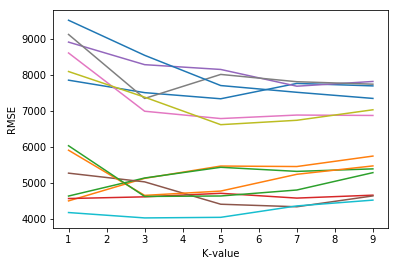

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for key,value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel("K-value")
    plt.ylabel("RMSE")

## Multivariate Model

In [18]:
# Find the RMSE averages for diffrerent "k" values

rmse_avg = {}
for key,value in k_rmse_results.items():
    avg_rmse = np.mean(list(value.values()))
    rmse_avg[key] = avg_rmse
series_rmse = pd.Series(rmse_avg)
series_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [20]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', normalized)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', normalized)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', normalized)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length']
rmse_val = knn_train_test(five_best_features, 'price', normalized)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg']
rmse_val = knn_train_test(six_best_features, 'price', normalized)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3305.9401397969677},
 'four best features': {5: 3358.6915801682458},
 'five best features': {5: 3665.546673045813},
 'six best features': {5: 3628.261188214127}}

In [21]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', normalized)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', normalized)
k_rmse_results["four best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'highway-mpg' , 'length', 'city-mpg']
rmse_val = knn_train_test(six_best_features, 'price', normalized)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'three best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.9

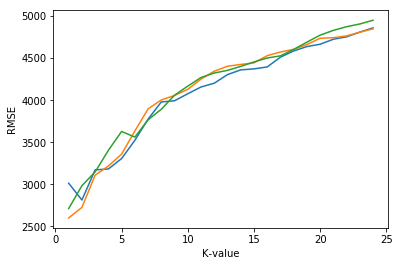

In [22]:
for key,value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel("K-value")
    plt.ylabel("RMSE")